# Pregunta 1
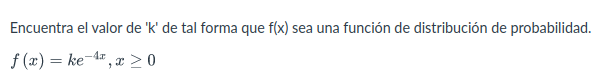

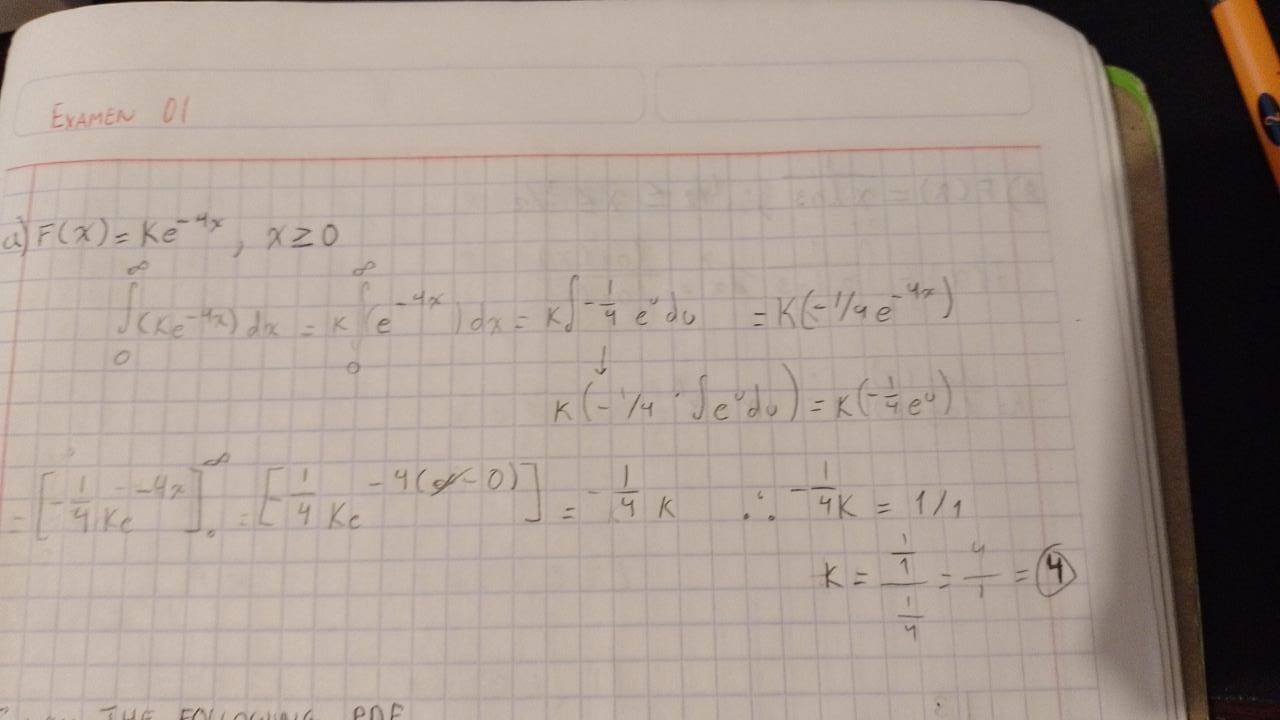

# Pregunta 2
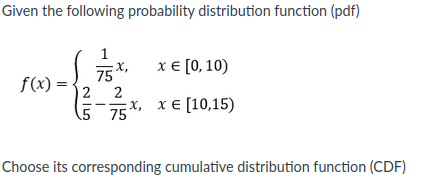

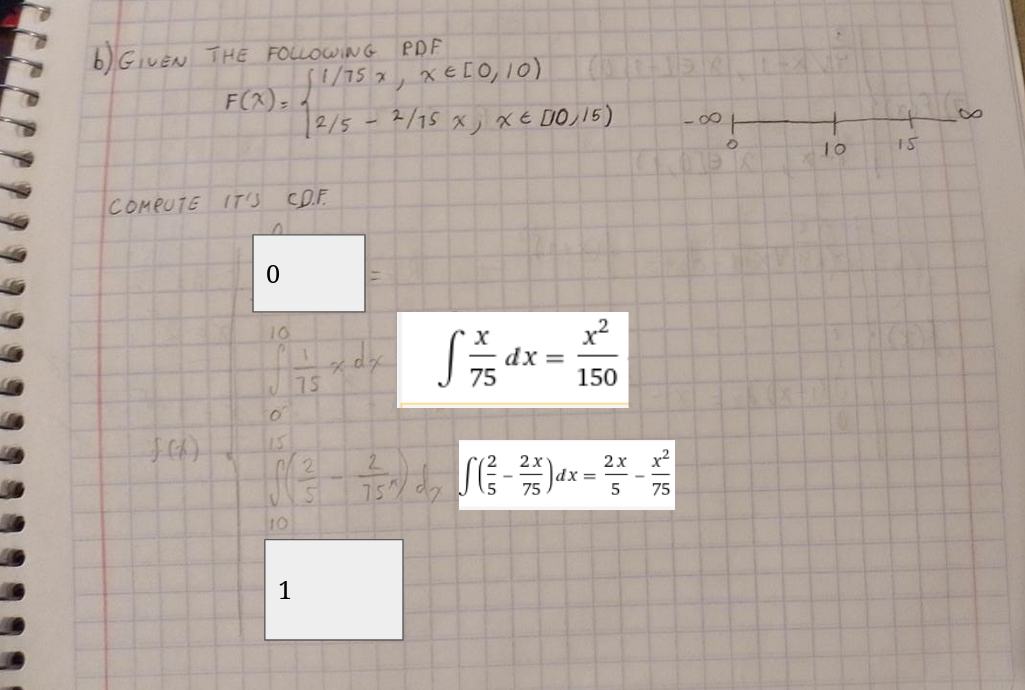

# Pregunta 3
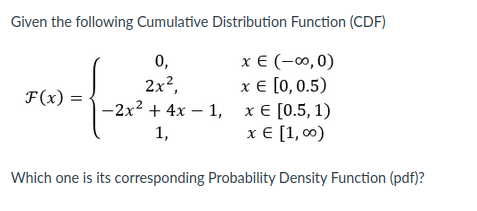

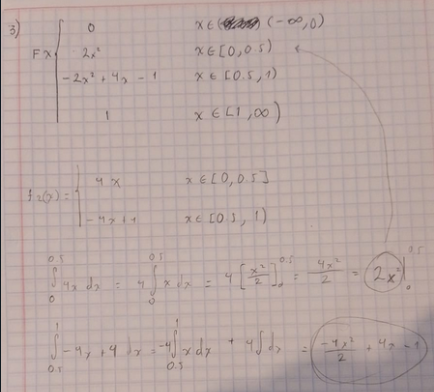

# Pregunta 4
Plot the histogram, what seems to be the distribution the data set comes from?

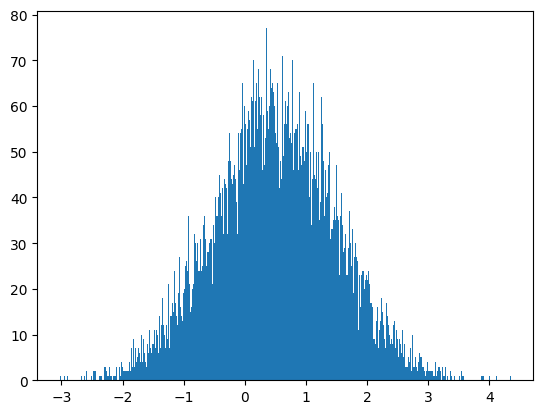

It is a normal distribution set!


In [1]:
import matplotlib.pyplot as plt

file = 'numbers01-1.txt'
def fileToList(file):
    with open(file,'r') as f:
        data = [line.strip() for line in f] 
    fileList = []

    for line in data:
        value = float(line)
        fileList.append(value)
    return fileList

x = fileToList(file)
c = 500
plt.hist(x, bins = c)
plt.show()

print('It is a normal distribution set!')

# Pregunta 6
Using the Linear Congruential Method, generate 1000 numbers with the following parameters: X0 = 13, a = 21, c = 1, m = 1227

Use the chi-squared test (with C = 10 and W = 0.10) and choose the calculated value for X^2

In [2]:
def linearCongruentialMethod(xi, a, c, m, iter):
    randomNumbers=[]
    if iter <= 0:
        raise ValueError("Incorect number of iterations, must be above than cero")
    else:
        for i in range(1,iter +1):

            x = ((a * xi)+ c) % m 
            r = x/m
            randomNumbers.append(r)
            
            xi = x

    return randomNumbers

lcm = linearCongruentialMethod(13,21,1,1227,1000)


In [3]:
from prettytable import PrettyTable

def chiSquare(list):
    #Computing interval list and formating it
    list.sort()
    intervalList = []

    #given a number of clases C= 10 and a weight W = 0.10
    holder = 0
    for i in range(0,10): 
        intervalList.append(holder/10)
        holder += 1
        intervalList.append(holder/10)

    intervalListTuple = [x for x in zip(*[iter(intervalList)]*2)]

    formatedList = []
    for j in intervalList:
        j = round(j,2)
        formatedList.append(j)

    formatedListTuple = [x for x in zip(*[iter(formatedList)]*2)]

    #getting observed results
    observedList = []
    counter = 0
    for i in intervalListTuple:
        for j in list:
            if j >= i[0] and j <= i[1]:
                counter += 1


        observedList.append(counter)
        counter = 0

    expectedList = []
    for i in observedList:
        expectedList.append(len(list)/len(intervalListTuple))


    #Computing chi square table
    chisquareList = []
    for i in range(0,10):
        chiSquareVal = (observedList[i] - expectedList[i] ) ** 2 / expectedList[i]
        chisquareList.append(chiSquareVal)

    x_total  = 0
    for j in chisquareList:
        x_total += j 
        
    formatedChiSquareList = []
    for j in chisquareList:
        j = "{0:.4f}".format(j)
        formatedChiSquareList.append(j)
        

    print('H0: Generated numbers are not different from the uniform distribution')
    print('H1: Generated numbers are different from the uniform distribution')
    print('\n')
    if x_total > 16.91:
        print('Since', round(x_total,4),' > 16.91, H0 is rejected')
    else:
        print('Since', round(x_total,4),' < 16.91, H0 is accepted')
    print('---------------------------------------------------- X\u00b2: ',round(x_total,4))

    chi_table = PrettyTable()
    chi_table.add_column('Intervals',formatedListTuple)
    chi_table.add_column('Observed (O)',observedList)
    chi_table.add_column('Expected (E)', expectedList)
    chi_table.add_column('(O - E) ^ 2 / E', formatedChiSquareList)
    return(chi_table)

print(chiSquare(lcm))

H0: Generated numbers are not different from the uniform distribution
H1: Generated numbers are different from the uniform distribution


Since 1.3  < 16.91, H0 is accepted
---------------------------------------------------- X²:  1.3
+------------+--------------+--------------+-----------------+
| Intervals  | Observed (O) | Expected (E) | (O - E) ^ 2 / E |
+------------+--------------+--------------+-----------------+
| (0.0, 0.1) |      95      |    100.0     |      0.2500     |
| (0.1, 0.2) |      97      |    100.0     |      0.0900     |
| (0.2, 0.3) |     107      |    100.0     |      0.4900     |
| (0.3, 0.4) |      98      |    100.0     |      0.0400     |
| (0.4, 0.5) |      97      |    100.0     |      0.0900     |
| (0.5, 0.6) |     103      |    100.0     |      0.0900     |
| (0.6, 0.7) |      98      |    100.0     |      0.0400     |
| (0.7, 0.8) |      99      |    100.0     |      0.0100     |
| (0.8, 0.9) |     104      |    100.0     |      0.1600     |
| (0.9, 1

# Pregunta 6


Generate 500 numbers from the Linear Congruential Generator with parameters: X0 = 7, a = 3, c = 1, m = 127

Run the Chi-square test and Runs test with α =  0.05 and choose the correct statement about the generated numbers.


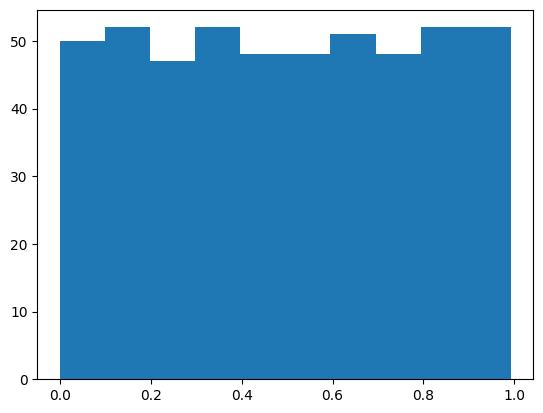

In [4]:
lcm2 = linearCongruentialMethod(7,3,1,127,500) 
plt.hist(lcm2, bins = 10)
plt.show()

In [5]:
print(chiSquare(lcm2))

H0: Generated numbers are not different from the uniform distribution
H1: Generated numbers are different from the uniform distribution


Since 0.76  < 16.91, H0 is accepted
---------------------------------------------------- X²:  0.76
+------------+--------------+--------------+-----------------+
| Intervals  | Observed (O) | Expected (E) | (O - E) ^ 2 / E |
+------------+--------------+--------------+-----------------+
| (0.0, 0.1) |      50      |     50.0     |      0.0000     |
| (0.1, 0.2) |      52      |     50.0     |      0.0800     |
| (0.2, 0.3) |      51      |     50.0     |      0.0200     |
| (0.3, 0.4) |      48      |     50.0     |      0.0800     |
| (0.4, 0.5) |      48      |     50.0     |      0.0800     |
| (0.5, 0.6) |      52      |     50.0     |      0.0800     |
| (0.6, 0.7) |      47      |     50.0     |      0.1800     |
| (0.7, 0.8) |      52      |     50.0     |      0.0800     |
| (0.8, 0.9) |      52      |     50.0     |      0.0800     |
| (0.9,

# Pregunta 7

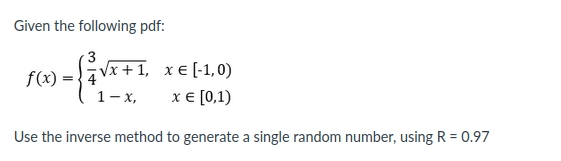

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def funcion_partes(n):
    r = np.random.rand(n)
    x = np.zeros(n)
    
    for i in range(0,n):
        if 0< r[i] < 0.5:
            x[i] = (2 **(3/2)) * r ^ (3/2) - 1
        else:
            x[i] = ((1 - 2*r)**(1/2)) + 1
    return x

n = 200000
x = funcion_partes(n)

c = 500
plt.hist(x, bins = c)
plt.show()

print('valor esperado aprox: ', x.mean())

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Pregunta 8
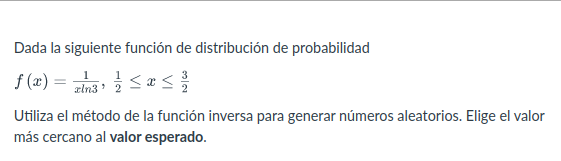

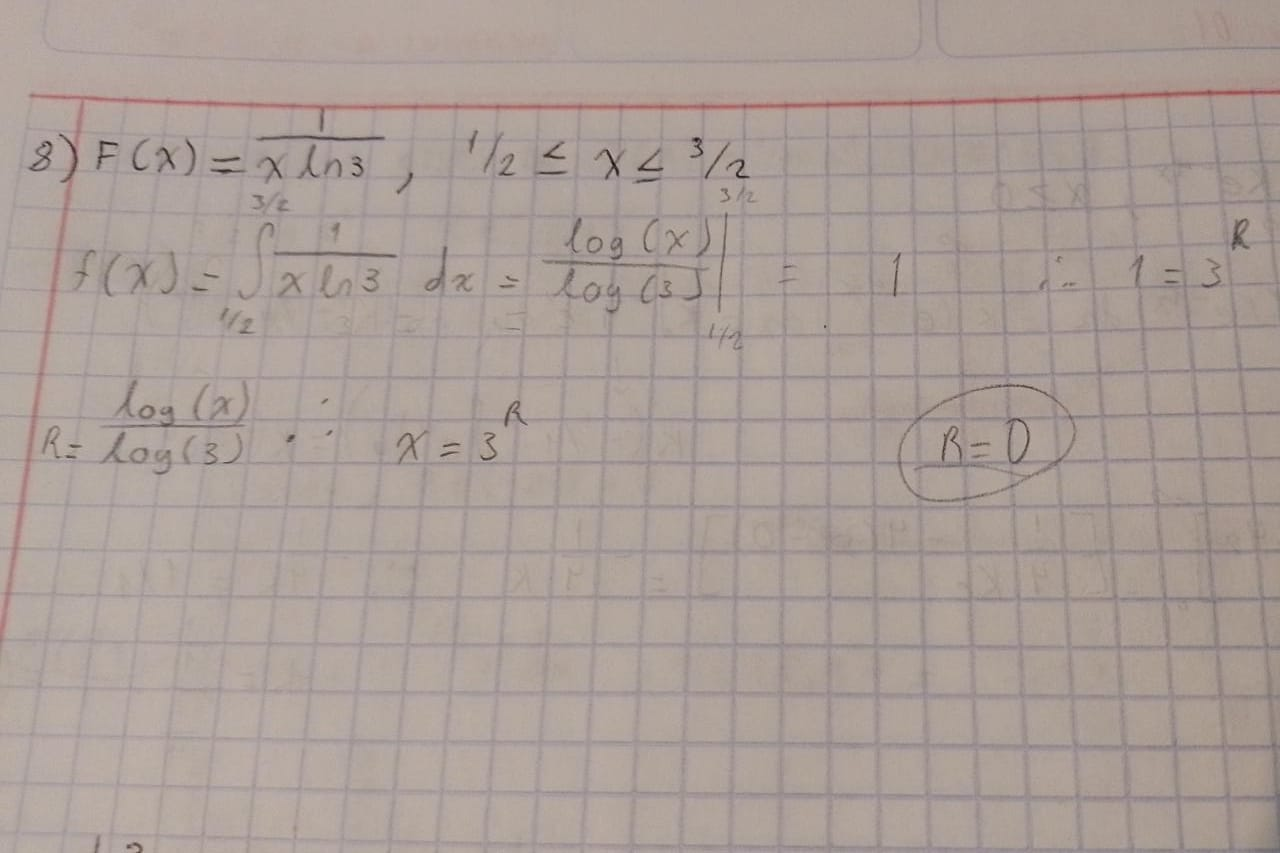